# Visualized AIMD EXAFS from FEFF
Data courtesy of Micah Prange and Eugene Ilton

In [35]:
import utils
import wavelet_transform
from importlib import reload

utils = reload(utils)
wavelet_transform = reload(wavelet_transform)
from utils import *

## Get data and visualize

In [2]:
datafiles = os.listdir('Data/')
Data = np.array([read_file(f'Data/{filename}') for filename in datafiles])
print(Data.shape)

(839, 414, 4)


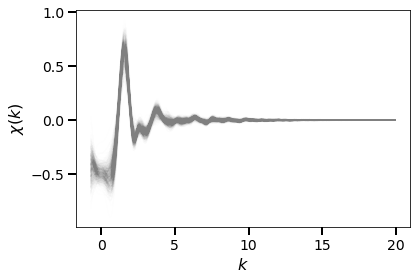

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))
for run in Data:
    plt.plot(run[:, 0], run[:, 1], '-', c='gray', alpha=0.005)
ax.tick_params(direction='out', width=2, length=8, which='major', labelsize=14)
ax.set_xlabel('$k$', fontsize=16)
ax.set_ylabel('$\chi(k)$', fontsize=16)
plt.show()

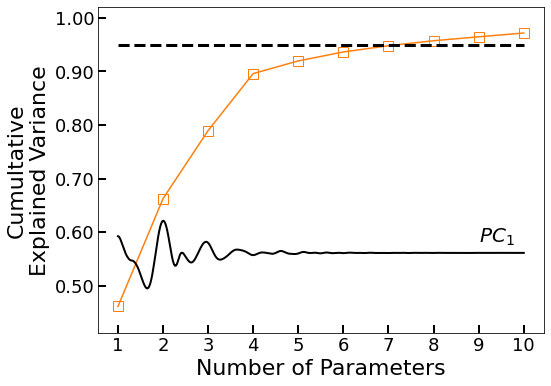

In [15]:
make_scree_plot(Data[:, :, 1], n=10)

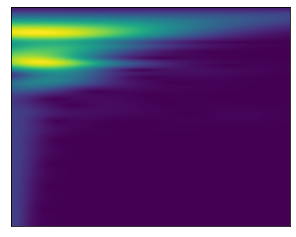

In [37]:
i = 0
wavelet = wavelet_transform.cauchy_wavelet(Data[i, :, 0], Data[i, :, 1])
modulus = np.sqrt(result.real**2 + result.imag**2)

fig, ax = plt.subplots(figsize=(5, 5))
plt.imshow(modulus)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [68]:
from PIL import Image
images = []
mods = []
for i in range(len(Data)):
    print(i, end='\r')
    wavelet = wavelet_transform.cauchy_wavelet(Data[i, :, 0], Data[i, :, 1])
    modulus = np.sqrt(wavelet.real**2 + wavelet.imag**2)
    img = Image.fromarray(np.uint8(plt.cm.viridis(modulus / np.max(modulus)) * 255))
    images.append(img)
    mods.append(modulus)


frame_one = images[0]
frame_one.save("wavelets.gif", format="GIF", append_images=images,
               save_all=True, duration=2, loop=0)